# 03. Phenotypic Phase Planes

In [1]:
#call load_model
%run 00load_model.ipynb

## Effects on cell growth

In [2]:
#Creation of datapoints for PPPs
growth_glc = production_envelope(model, ["EX_glc__D_e"])
growth_o2 = production_envelope(model, ["EX_o2_e"])

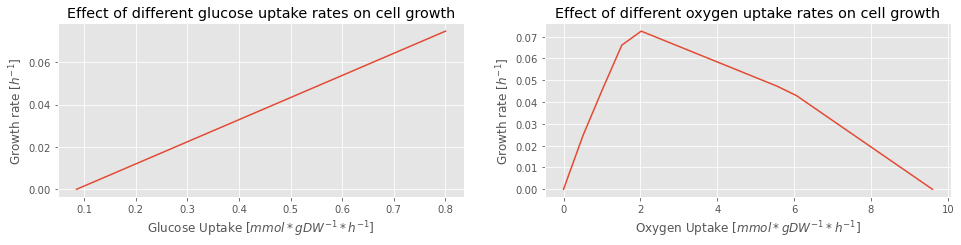

In [3]:
fig = plt.figure(figsize=plt.figaspect(0.2));

#Plot effect of glucose on growth
ax1 = fig.add_subplot(1, 2, 1);
ax1.plot(-1*growth_glc.EX_glc__D_e, growth_glc.flux_maximum);
ax1.set_xlabel(r"Glucose Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax1.set_ylabel(r"Growth rate $[h^{-1}]$");
ax1.set_title('Effect of different glucose uptake rates on cell growth');

#Plot effect of oxygen on growth
ax2 = fig.add_subplot(1, 2, 2);
ax2.plot(-1*growth_o2.EX_o2_e, growth_o2.flux_maximum);
ax2.set_xlabel(r"Oxygen Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax2.set_ylabel(r"Growth rate $[h^{-1}]$");
ax2.set_title('Effect of different oxygen uptake rates on cell growth');

## Effects on undecylprodigiosin production

In [4]:
#Creation of datapoints for PPPs with alternative objective function
with model:
    model.objective = model.reactions.DM_RED_c
    model.reactions.BIOMASS_SCO_tRNA.lower_bound = 0.045
    prod_glc = production_envelope(model, ["EX_glc__D_e"])
    prod_o2 = production_envelope(model, ["EX_o2_e"])

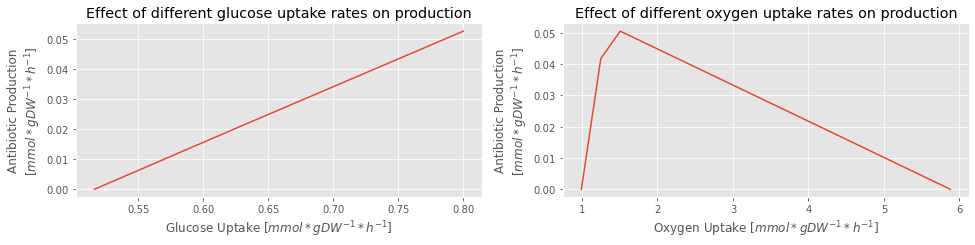

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.2));

#Plot effect of glucose on production
ax1 = fig.add_subplot(1, 2, 1);
ax1.plot(-1*prod_glc.EX_glc__D_e, prod_glc.flux_maximum);
ax1.set_xlabel("Glucose Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax1.set_ylabel("Antibiotic Production\n$[mmol*gDW^{-1}*h^{-1}]$");
ax1.set_title('Effect of different glucose uptake rates on production');

#Plot effect of oxygen on production
ax2 = fig.add_subplot(1, 2, 2);
ax2.plot(-1*prod_o2.EX_o2_e, prod_o2.flux_maximum);
ax2.set_xlabel("Oxygen Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax2.set_ylabel("Antibiotic Production\n$[mmol*gDW^{-1}*h^{-1}]$");
ax2.set_title('Effect of different oxygen uptake rates on production');

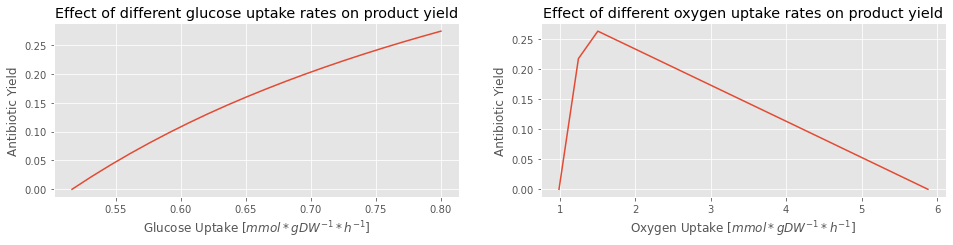

In [6]:
fig = plt.figure(figsize=plt.figaspect(0.2));

#Plot effect of glucose on yield
ax1 = fig.add_subplot(1, 2, 1);
ax1.plot(-1*prod_glc.EX_glc__D_e, prod_glc.carbon_yield_maximum);
ax1.set_xlabel("Glucose Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax1.set_ylabel("Antibiotic Yield");
ax1.set_title('Effect of different glucose uptake rates on product yield');

#Plot effect of oxygen on yield
ax2 = fig.add_subplot(1, 2, 2);
ax2.plot(-1*prod_o2.EX_o2_e, prod_o2.carbon_yield_maximum);
ax2.set_xlabel("Oxygen Uptake $[mmol*gDW^{-1}*h^{-1}]$");
ax2.set_ylabel("Antibiotic Yield");
ax2.set_title('Effect of different oxygen uptake rates on product yield');

## Combined glucose and oxygen effect on production

In [7]:
#Creation of datapoints for 3D PPP with alternative objective function
with model:
    model.objective = model.reactions.DM_RED_c
    model.reactions.BIOMASS_SCO_tRNA.lower_bound = 0.045
    prod_3d = production_envelope(model, ["EX_glc__D_e","EX_o2_e"], objective="DM_RED_c")
    # Delete rows with initial conditions that made the simulation infeasible
    prod_3d=prod_3d.dropna().reset_index(drop=True)

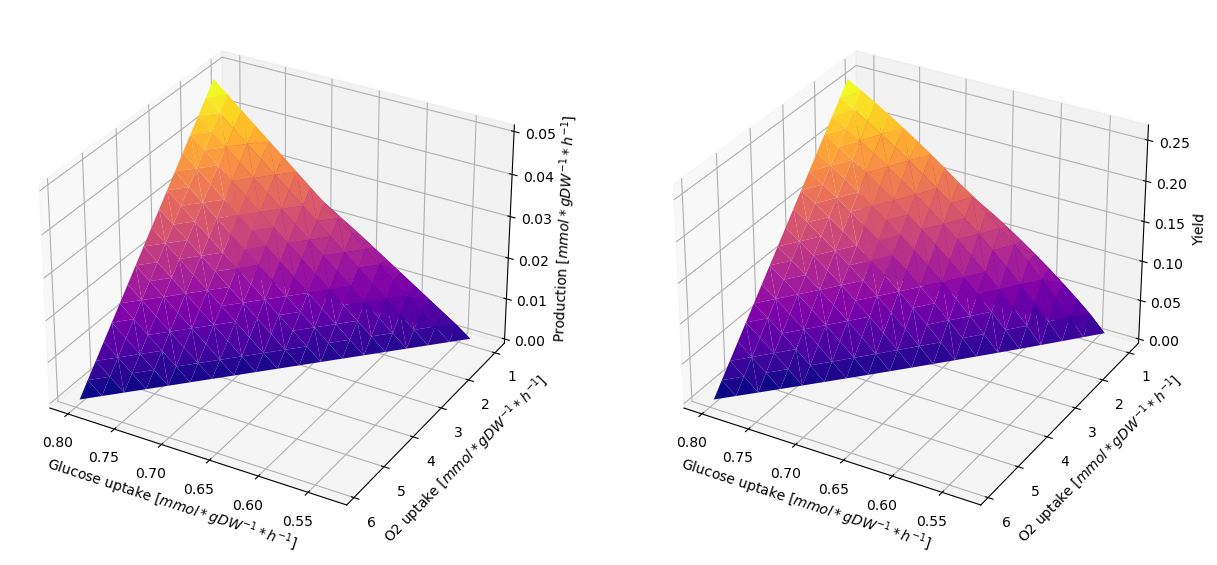

In [8]:
plt.style.use('default')
fig = plt.figure()
fig.set_size_inches(15, 10)

# Plot 3d graph of the effect of various glucose and oxygen uptake combinations on production
ax = fig.add_subplot(121, projection='3d')
ax.plot_trisurf(-1*prod_3d.EX_glc__D_e, -1*prod_3d.EX_o2_e, prod_3d.flux_maximum, cmap='plasma')

ax.set_xlabel('Glucose uptake $[mmol*gDW^{-1}*h^{-1}]$')
ax.set_ylabel('O2 uptake $[mmol*gDW^{-1}*h^{-1}]$')
ax.set_zlabel('Production $[mmol*gDW^{-1}*h^{-1}]$')
ax.view_init(30, 120)

# Plot 3d graph of the effect of various glucose and oxygen uptake combinations on yield
axs = fig.add_subplot(122, projection='3d')
axs.plot_trisurf(-1*prod_3d.EX_glc__D_e, -1*prod_3d.EX_o2_e, prod_3d.carbon_yield_maximum, cmap='plasma')

axs.set_xlabel('Glucose uptake $[mmol*gDW^{-1}*h^{-1}]$')
axs.set_ylabel('O2 uptake $[mmol*gDW^{-1}*h^{-1}]$')
axs.set_zlabel('Yield')
axs.view_init(30, 120)

## Comments

<div style="text-align: justify">
    The same comment can be made for all the graphs in this notebook. Independently of the model objective, the phenotypic phase planes have the same profile. For maximum growth, production or yield the cells should consume the maximum amount of glucose available. Moreover, the optimal uptake rate of oxygen is approximately 1.5 $mmol\over gDW*h$ for 0.8 $mmol\over gDW*h$ of glucose.
</div>